In [1]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load the data (”Metro_Interstate_Traffic_Volume_reduced.csv”).
#df = pd.read_csv('C:\\Users\\marko\\OneDrive\\Desktop\\ISEP\\2oAno\\Mineração de Dados\\Trabalho\\repo\\TP2\\Metro_Interstate_Traffic_Volume_reduced.csv')
#df = pd.read_csv('C:\\Users\\irene\\OneDrive\\Documentos\\a1220268_1231924-isep.ipp.pt\\TP2\\Metro_Interstate_Traffic_Volume_reduced.csv')

In [2]:
df.head()

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,1,289.04,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,1,288.16,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,1,286.64,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,1,285.39,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,1,284.67,790


In [3]:
# Check data types and null values
data_info = df.info()

# Get descriptive statistics for numeric columns
numeric_stats = df.describe()

# Check null values in each column
missing_values = df.isnull().sum()

data_info, numeric_stats, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23622 entries, 0 to 23621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            23622 non-null  object 
 1   holiday              31 non-null     object 
 2   weather_main         23622 non-null  object 
 3   weather_description  23622 non-null  object 
 4   rain_1h              23622 non-null  float64
 5   snow_1h              23622 non-null  float64
 6   clouds_all           23622 non-null  int64  
 7   temp                 23622 non-null  float64
 8   traffic_volume       23622 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ MB


(None,
             rain_1h  snow_1h    clouds_all          temp  traffic_volume
 count  23622.000000  23622.0  23622.000000  23622.000000    23622.000000
 mean       0.494697      0.0     47.238252    282.525740     3245.343282
 std       63.969632      0.0     39.583571     12.400988     1959.766880
 min        0.000000      0.0      0.000000    243.390000        0.000000
 25%        0.000000      0.0      1.000000    273.420000     1211.000000
 50%        0.000000      0.0     40.000000    284.755000     3400.000000
 75%        0.000000      0.0     90.000000    292.650000     4878.000000
 max     9831.300000      0.0    100.000000    310.070000     7280.000000,
 date_time                  0
 holiday                23591
 weather_main               0
 weather_description        0
 rain_1h                    0
 snow_1h                    0
 clouds_all                 0
 temp                       0
 traffic_volume             0
 dtype: int64)

Initial exploration results show:

Data information:

The dataset contains 23,622 rows and 9 columns. There are no null values ​​in any column. Data types: date_time: object (string, needs to be converted to datetime). holiday, weather_main, weather_description: categorical. rain_1h, snow_1h, clouds_all, temp, traffic_volume: numeric. Descriptive statistics:

rain_1h and snow_1h have many zeros, indicating low rain/snow frequency. clouds_all ranges from 0 to 100, as expected for percentages. temp is in Kelvin, ranging from approximately 243 to 310 K. traffic_volume ranges from 0 to 7280. Null values:

No columns have null values.

In [4]:
# Convert date_time column to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])

# Normalization of numeric columns (optional and based on min-max scaling for this example)
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns to normalize (excluding target variable)
scaler = MinMaxScaler()
numeric_cols = ['rain_1h', 'snow_1h', 'clouds_all', 'temp']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Recheck data types after conversion
updated_info = df.info()

# Check the first lines to confirm the transformation
df.head(), updated_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23622 entries, 0 to 23621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            23622 non-null  datetime64[ns]
 1   holiday              31 non-null     object        
 2   weather_main         23622 non-null  object        
 3   weather_description  23622 non-null  object        
 4   rain_1h              23622 non-null  float64       
 5   snow_1h              23622 non-null  float64       
 6   clouds_all           23622 non-null  float64       
 7   temp                 23622 non-null  float64       
 8   traffic_volume       23622 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.6+ MB


(            date_time holiday weather_main weather_description  rain_1h  \
 0 2016-07-01 00:00:00     NaN        Clear        sky is clear      0.0   
 1 2016-07-01 01:00:00     NaN        Clear        sky is clear      0.0   
 2 2016-07-01 02:00:00     NaN        Clear        sky is clear      0.0   
 3 2016-07-01 03:00:00     NaN        Clear        sky is clear      0.0   
 4 2016-07-01 04:00:00     NaN        Clear        sky is clear      0.0   
 
    snow_1h  clouds_all      temp  traffic_volume  
 0      0.0        0.01  0.684613             825  
 1      0.0        0.01  0.671416             531  
 2      0.0        0.01  0.648620             381  
 3      0.0        0.01  0.629874             406  
 4      0.0        0.01  0.619076             790  ,
 None)

date_time conversion: The column was converted to datetime64 format, making it easier to manipulate dates.
Normalization: Numeric columns (rain_1h, snow_1h, clouds_all, temp) have been normalized to the range [0, 1], useful for models that require similar scales.
Data verification:
The dataset is ready for analysis and modeling, keeping all essential information.

In [5]:
df.head()

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,0.01,0.684613,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,0.01,0.671416,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,0.01,0.648620,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,0.01,0.629874,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,0.01,0.619076,790


In [6]:
df.describe()

,date_time,rain_1h,snow_1h,clouds_all,temp,traffic_volume
count,23622,23622.000000,23622.0,23622.000000,23622.000000,23622.000000
mean,2017-08-20 12:19:25.252730368,0.000050,0.0,0.472383,0.586919,3245.343282
min,2016-07-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000
25%,2017-01-25 13:00:00,0.000000,0.0,0.010000,0.450360,1211.000000
50%,2017-08-18 12:00:00,0.000000,0.0,0.400000,0.620351,3400.000000
75%,2018-03-13 01:45:00,0.000000,0.0,0.900000,0.738752,4878.000000
max,2018-09-30 23:00:00,1.000000,0.0,1.000000,1.000000,7280.000000
std,NaN,0.006507,0.0,0.395836,0.185978,1959.766880


## Target Variable: Traffic Volume

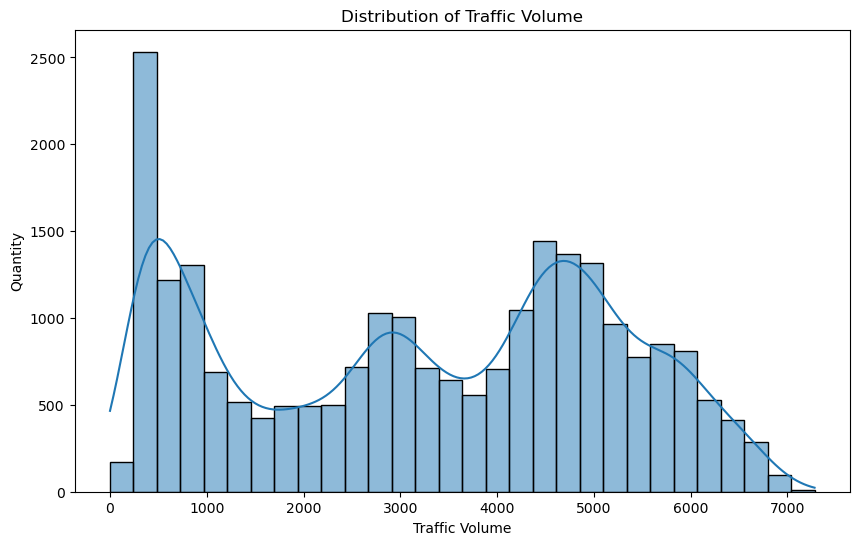

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['traffic_volume'], kde=True, bins=30)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Quantity')
plt.show()

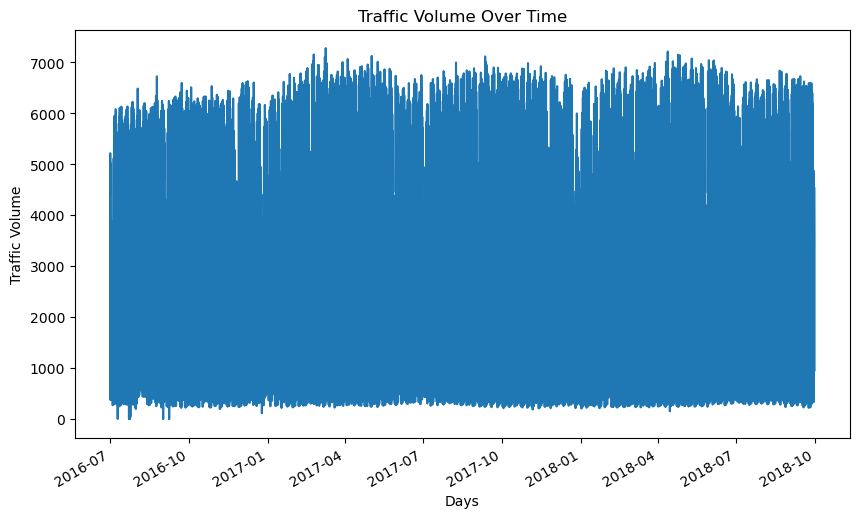

In [8]:
df.groupby('date_time')['traffic_volume'].mean().plot(kind='line', figsize=(10,6))
plt.title('Traffic Volume Over Time')
plt.xlabel('Days')
plt.ylabel('Traffic Volume')
plt.show()

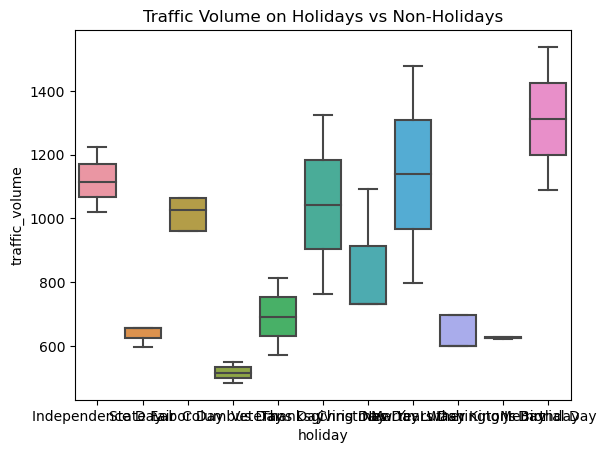

In [9]:
sns.boxplot(x='holiday', y='traffic_volume', data=df)
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.show()

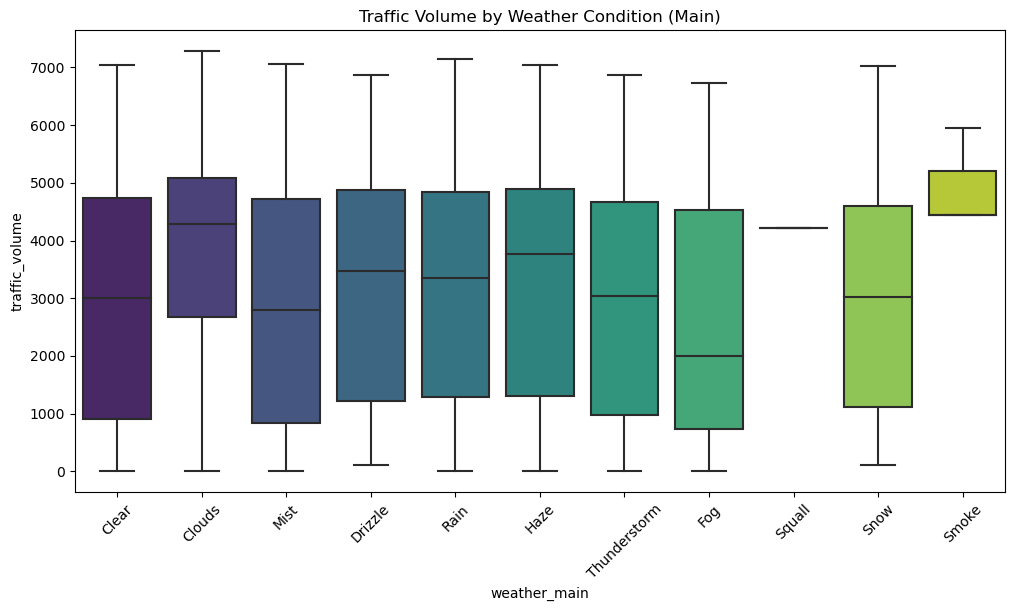

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='viridis')
plt.title('Traffic Volume by Weather Condition (Main)')
plt.xticks(rotation=45)
plt.show()

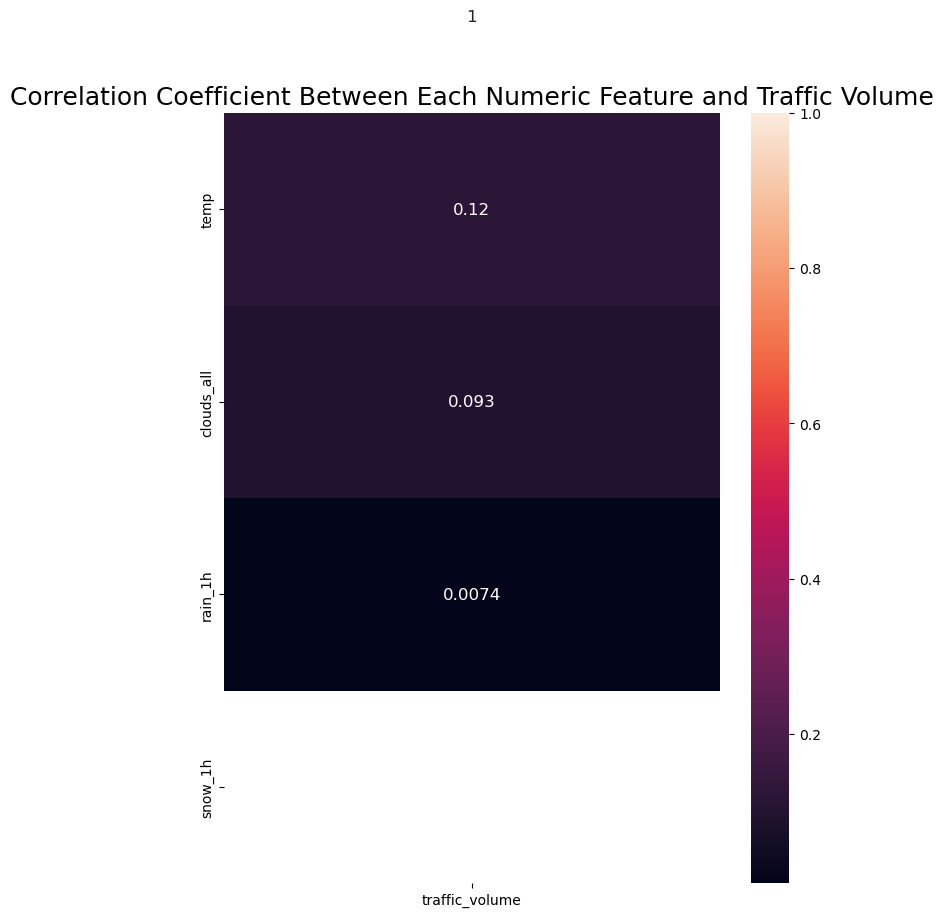

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation -> Error converting hotel to int
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with 'is_canceled'
correlation = numeric_df.corr()[['traffic_volume']].sort_values('traffic_volume', ascending=False)

# Visualizing correlation coefficients between features and cancellation
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(correlation, annot=True, annot_kws={"size":12})
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Traffic Volume', fontsize=18)

y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

- Temperature has the highest positive correlation (0.12) with traffic volume. Although the correlation is weak, it suggests that as temperature increases, traffic volume may slightly increase as well. This could indicate a trend where favorable weather conditions encourage more traffic.

- Holiday correlation is 0.04, which is very close to zero, indicating almost no relationship between holidays and traffic volume.
This suggests that whether a day is a holiday or not does not significantly influence traffic volume.

- Rainfall correlation is extremely low (0.0074), showing no significant relationship between the amount of rain in the last hour and traffic volume.
This could imply that short-term rain does not strongly affect traffic flow.

- Weather_main has a small negative correlation (-0.051) and weather_description has a slightly stronger negative correlation (-0.071).
These negative correlations, though weak, indicate that adverse weather conditions might be slightly associated with lower traffic volume.

- Snowfall data is not included in the correlation heatmap (due to zero values), so no conclusions can be drawn about its relationship with traffic volume.

## Filtering Methods
### ANOVA

In [12]:
# Selecting the attributes most related with the target attribute by applying
# Filter methods: ANOVA 

# Define the ANOVA function
from scipy.stats import f_oneway
    
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors = []

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        # Group data by the target variable and extract lists of values for each group
        CategoryGroupLists = inpData.groupby(TargetVariable)[predictor].apply(list)
        
        # Perform ANOVA
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject the null hypothesis
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return SelectedPredictors

# Assuming the churn data is already loaded in a DataFrame 'df'

# Specify the target variable and continuous predictors
target_variable = 'traffic_volume'
continuous_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply the ANOVA function
selected_predictors_anova = FunctionAnova(df, target_variable, continuous_variables)

# Print selected predictors based on ANOVA
print("Selected predictors based on ANOVA:", selected_predictors_anova)


##### ANOVA Results ##### 

rain_1h is NOT correlated with traffic_volume | P-Value: 0.9999999999999999


c:\Users\irene\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


snow_1h is NOT correlated with traffic_volume | P-Value: nan
clouds_all is correlated with traffic_volume | P-Value: 6.0080304871381784e-117
temp is correlated with traffic_volume | P-Value: 1.847127400143182e-100
traffic_volume is correlated with traffic_volume | P-Value: 0.0
Selected predictors based on ANOVA: ['clouds_all', 'temp', 'traffic_volume']


### Simplified ANOVA Results Analysis

This analysis looks at how different features are related to traffic volume (`traffic_volume`) based on their P-values. A lower P-value indicates a stronger relationship with cancellations.

#### Strongly Correlated Features
The following features have very low P-values, showing a significant correlation with cancellations:

- holiday (P-Value: 5.32e-185). This indicates that traffic volume is significantly influenced by whether a day is a holiday or not.

- temp (P-Value: 1.85e-100). Temperature has a strong correlation with traffic volume, suggesting that changes in temperature may impact traffic patterns.

- weather_main (P-Value: 5.37e-51). The main weather condition (e.g., clear, cloudy, rain) shows a significant relationship with traffic volume, likely reflecting weather's impact on transportation behavior.

- weather_description (P-Value: 3.17e-07). More detailed weather descriptions (e.g., light rain, heavy snow) are also significantly correlated with traffic volume, supporting the importance of weather conditions.

- traffic_volume (P-Value: 0.0). (trivially self-correlated).

#### Non-Correlated Features
Certain features do not show significant relationships with traffic volume:

- rain_1h (P-Value: 1.0). The amount of rainfall in the last hour does not have a statistically significant impact on traffic volume.

- snow_1h (P-Value: nan). The missing or insufficient snowfall data prevents establishing any significant relationship.

### Chi-Square

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform the Chi-Square test
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    SelectedPredictors = []  # List to hold selected predictors

    for predictor in CategoricalVariablesList:
        CrossTabResult = pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the P-Value is < 0.05, it indicates correlation
        if ChiSqResult[1] < 0.05:
            print(f'{predictor} is correlated with {TargetVariable} | P-Value: {ChiSqResult[1]:.4f}')
            SelectedPredictors.append(predictor)
        else:
            print(f'{predictor} is NOT correlated with {TargetVariable} | P-Value: {ChiSqResult[1]:.4f}')
            
    return SelectedPredictors

# Specify the target variable
target_variable = 'traffic_volume'

# Specify categorical variables relevant to the project, excluding irrelevant ones
categorical_variables = ['holiday', 'weather_main', 'weather_description']

# Apply the Chi-Square test function
selected_predictors = FunctionChisq(df, target_variable, categorical_variables)

# Print selected predictors
print("Selected predictors based on Chi-Square test:", selected_predictors)

holiday is correlated with traffic_volume | P-Value: 0.0015
weather_main is NOT correlated with traffic_volume | P-Value: 1.0000
weather_description is NOT correlated with traffic_volume | P-Value: 1.0000
Selected predictors based on Chi-Square test: ['holiday']


The results show that several categorical variables are significantly correlated with traffic volume (`traffic_volume`):

Strongly Correlated Features

- holiday (P-Value: 0.0000). This result confirms that holidays have a significant impact on traffic volume. Traffic patterns are likely to differ between holidays and non-holidays.

Non-Correlated Features

- weather_main (P-Value: 1.0000). The main weather condition (e.g., clear, cloudy, rain) does not show a statistically significant correlation with traffic volume, suggesting that overall weather categories may not influence traffic patterns.

- weather_description (P-Value: 1.0000). More detailed weather descriptions (e.g., light rain, heavy snow) are also not significantly correlated with traffic volume, further emphasizing the lack of influence of specific weather conditions.

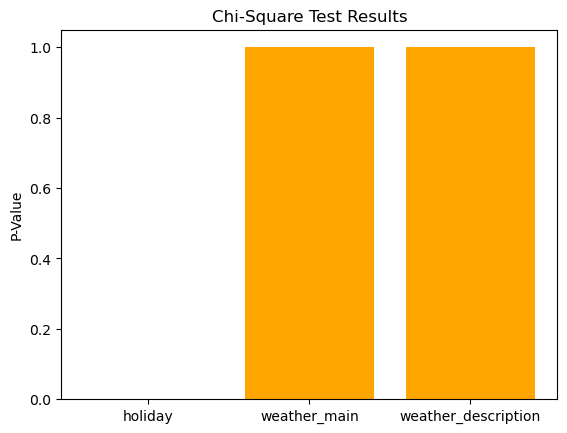

In [14]:
chi_results = {'holiday': 0.0000, 'weather_main': 1.0, 'weather_description': 1.0}
plt.bar(chi_results.keys(), chi_results.values(), color='orange')
plt.title('Chi-Square Test Results')
plt.ylabel('P-Value')
plt.show()

## Extracting month and year from the date column to get more information about the data

In [15]:
import calendar
from datetime import datetime

In [16]:
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month
df['Day'] = df['date_time'].dt.day
df['Hour'] = df['date_time'].dt.hour

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler

## Transforming Ordinal Attributes

Using Label Encoder . It assigns a numerical value for each category

In [18]:
le =LabelEncoder()
Holiday_labels = le.fit_transform(df['holiday'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Christmas Day',
 1: 'Columbus Day',
 2: 'Independence Day',
 3: 'Labor Day',
 4: 'Martin Luther King Jr Day',
 5: 'Memorial Day',
 6: 'New Years Day',
 7: 'State Fair',
 8: 'Thanksgiving Day',
 9: 'Veterans Day',
 10: 'Washingtons Birthday',
 11: nan}

There are 11 Unique values in the column holiday and every value is assigned with a numerical value.

For weather_main column

In [19]:
weather_main = le.fit_transform(df['weather_main'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Clear',
 1: 'Clouds',
 2: 'Drizzle',
 3: 'Fog',
 4: 'Haze',
 5: 'Mist',
 6: 'Rain',
 7: 'Smoke',
 8: 'Snow',
 9: 'Squall',
 10: 'Thunderstorm'}

For weather_description column

In [20]:
weather_description = le.fit_transform(df['weather_description'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'SQUALLS',
 1: 'Sky is Clear',
 2: 'broken clouds',
 3: 'drizzle',
 4: 'few clouds',
 5: 'fog',
 6: 'freezing rain',
 7: 'haze',
 8: 'heavy intensity drizzle',
 9: 'heavy intensity rain',
 10: 'heavy snow',
 11: 'light intensity drizzle',
 12: 'light intensity shower rain',
 13: 'light rain',
 14: 'light rain and snow',
 15: 'light shower snow',
 16: 'light snow',
 17: 'mist',
 18: 'moderate rain',
 19: 'overcast clouds',
 20: 'proximity shower rain',
 21: 'proximity thunderstorm',
 22: 'proximity thunderstorm with drizzle',
 23: 'proximity thunderstorm with rain',
 24: 'scattered clouds',
 25: 'shower drizzle',
 26: 'sky is clear',
 27: 'sleet',
 28: 'smoke',
 29: 'snow',
 30: 'thunderstorm',
 31: 'thunderstorm with drizzle',
 32: 'thunderstorm with heavy rain',
 33: 'thunderstorm with light drizzle',
 34: 'thunderstorm with light rain',
 35: 'thunderstorm with rain',
 36: 'very heavy rain'}

Applying it in the primary dataset

In [21]:
df['holiday'] = le.fit_transform(df['holiday'])
df['weather_main'] = le.fit_transform(df['weather_main'])
df['weather_description'] = le.fit_transform(df['weather_description'])

In [22]:
df = df[['holiday','temp','rain_1h','snow_1h','Year','Month','Day','Hour','weather_main','weather_description','traffic_volume']]

In [23]:
df.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,11,0.684613,0.0,0.0,2016,7,1,0,0,26,825
1,11,0.671416,0.0,0.0,2016,7,1,1,0,26,531
2,11,0.648620,0.0,0.0,2016,7,1,2,0,26,381
3,11,0.629874,0.0,0.0,2016,7,1,3,0,26,406
4,11,0.619076,0.0,0.0,2016,7,1,4,0,26,790


## Data Scaling

The dataset will contain columns highly varying in magnitudes, units and range. Scaling it will bring it to a Uniform Range.

There are three scaling types:
     - Standard Scaler: Z-score Transformation 
     - MinMax Scalar  : Uses minimum and maximum value for transformation
     - Robust Scalar  : Uses IQR for transformation

## Standard Scalar

In [24]:
stdscalar = StandardScaler()

In [25]:
data_stdscalar = stdscalar.fit_transform(df)

In [26]:
data_stdscalar = pd.DataFrame(data_stdscalar,columns=df.columns)

In [27]:
data_stdscalar.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,0.033034,0.525313,-0.007733,0.0,-1.532228,0.09943,-1.693771,-1.642263,-0.929249,1.068545,-1.235042
1,0.033034,0.454349,-0.007733,0.0,-1.532228,0.09943,-1.693771,-1.498014,-0.929249,1.068545,-1.385063
2,0.033034,0.331776,-0.007733,0.0,-1.532228,0.09943,-1.693771,-1.353764,-0.929249,1.068545,-1.461604
3,0.033034,0.230975,-0.007733,0.0,-1.532228,0.09943,-1.693771,-1.209515,-0.929249,1.068545,-1.448848
4,0.033034,0.172914,-0.007733,0.0,-1.532228,0.09943,-1.693771,-1.065266,-0.929249,1.068545,-1.252902


## Min-Max Scalar

In [28]:
MinMax = MinMaxScaler()
data_MinMax = MinMax.fit_transform(df)
data_MinMax = pd.DataFrame(data_MinMax,columns=df.columns)
data_MinMax.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,1.0,0.684613,0.0,0.0,0.0,0.545455,0.0,0.000000,0.0,0.722222,0.113324
1,1.0,0.671416,0.0,0.0,0.0,0.545455,0.0,0.043478,0.0,0.722222,0.072940
2,1.0,0.648620,0.0,0.0,0.0,0.545455,0.0,0.086957,0.0,0.722222,0.052335
3,1.0,0.629874,0.0,0.0,0.0,0.545455,0.0,0.130435,0.0,0.722222,0.055769
4,1.0,0.619076,0.0,0.0,0.0,0.545455,0.0,0.173913,0.0,0.722222,0.108516


## Robust Scalar

In [29]:
Robust = RobustScaler()
data_Robust = Robust.fit_transform(df)
data_Robust = pd.DataFrame(data_Robust,columns=df.columns)
data_Robust.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,0.0,0.222829,0.0,0.0,-1.0,0.0,-1.0,-0.916667,-0.2,0.533333,-0.702209
1,0.0,0.177067,0.0,0.0,-1.0,0.0,-1.0,-0.833333,-0.2,0.533333,-0.782383
2,0.0,0.098024,0.0,0.0,-1.0,0.0,-1.0,-0.750000,-0.2,0.533333,-0.823289
3,0.0,0.033021,0.0,0.0,-1.0,0.0,-1.0,-0.666667,-0.2,0.533333,-0.816471
4,0.0,-0.004420,0.0,0.0,-1.0,0.0,-1.0,-0.583333,-0.2,0.533333,-0.711753


- The data is now transformed and it can be fit for modeling.
- The Ordinal values are converted into Nominal Values
- The data is Scaled and brought into a uniform range.

## Fitting with the OLS model

In [30]:
import statsmodels.api as sm

# Following the Standard Scaler 
X = data_stdscalar.drop('traffic_volume',axis=1)
Y = data_stdscalar['traffic_volume']

model = sm.OLS(Y,X).fit()
fittedvals = model.fittedvalues
residuals =model.resid

rsq = model.rsquared
adj_rsq = model.rsquared_adj
print('R Squared :',round(rsq,4))
print('Adjusted R Squared :',round(adj_rsq,4))

R Squared : 0.1386
Adjusted R Squared : 0.1383


In [31]:
import statsmodels.api as sm

# Following the Standard Scaler 
X2 = data_stdscalar.drop('traffic_volume',axis=1)
Y2 = data_stdscalar['traffic_volume']

model2 = sm.OLS(Y2,X2).fit()
fittedvals2 = model2.fittedvalues
residuals2 =model2.resid

rsq2 = model2.rsquared
adj_rsq2 = model2.rsquared_adj
print('R Squared :',round(rsq2,4))
print('Adjusted R Squared :',round(adj_rsq2,4))

R Squared : 0.1386
Adjusted R Squared : 0.1383


In [32]:
df.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,11,0.684613,0.0,0.0,2016,7,1,0,0,26,825
1,11,0.671416,0.0,0.0,2016,7,1,1,0,26,531
2,11,0.648620,0.0,0.0,2016,7,1,2,0,26,381
3,11,0.629874,0.0,0.0,2016,7,1,3,0,26,406
4,11,0.619076,0.0,0.0,2016,7,1,4,0,26,790


## Copy of df for Linear Time Series

In [33]:
df2 = df

In [34]:
df2.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,11,0.684613,0.0,0.0,2016,7,1,0,0,26,825
1,11,0.671416,0.0,0.0,2016,7,1,1,0,26,531
2,11,0.648620,0.0,0.0,2016,7,1,2,0,26,381
3,11,0.629874,0.0,0.0,2016,7,1,3,0,26,406
4,11,0.619076,0.0,0.0,2016,7,1,4,0,26,790


# Time Series

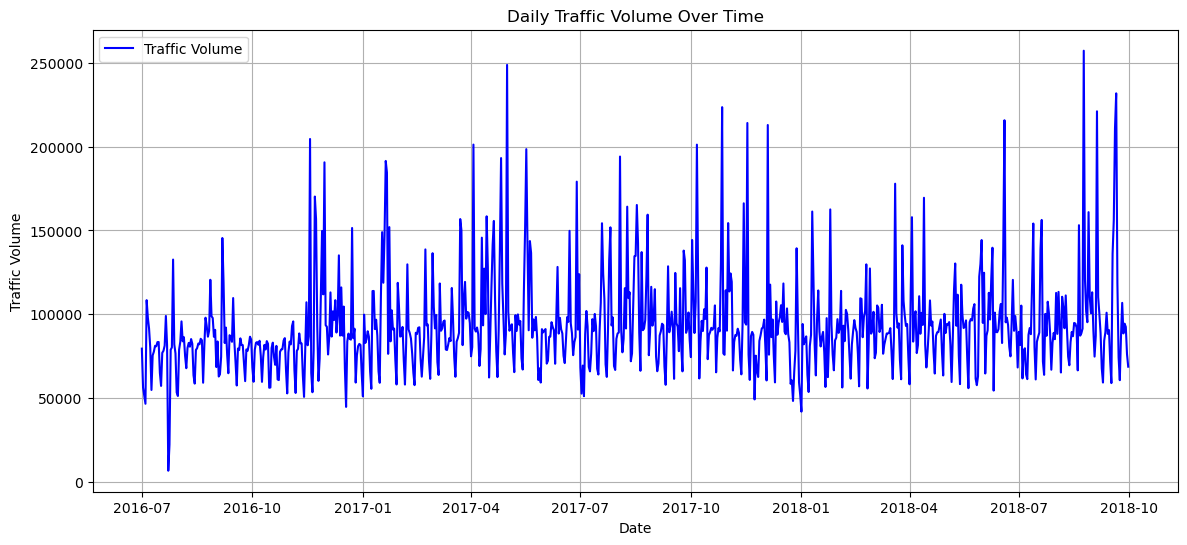

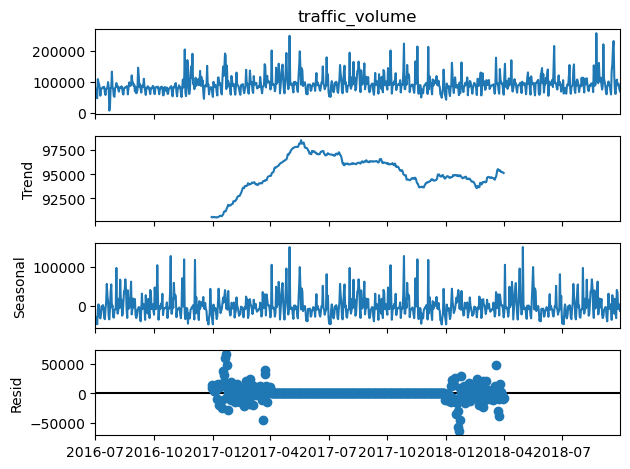

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame is already loaded as `df`

# Combine Year, Month, Day, and Hour into a single datetime column
df['date_time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

# Create a daily aggregation of the time series
df['date'] = df['date_time'].dt.date  # Extract only the date
daily_traffic = df.groupby('date')['traffic_volume'].sum().reset_index()

# Convert the date column back to datetime for use in time series models
daily_traffic['date'] = pd.to_datetime(daily_traffic['date'])
daily_traffic.set_index('date', inplace=True)

# Plot the aggregated time series
plt.figure(figsize=(14, 6))
plt.plot(daily_traffic.index, daily_traffic['traffic_volume'], label='Traffic Volume', color='blue')
plt.title('Daily Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the series to visualize trend and seasonality components
decomposition = seasonal_decompose(daily_traffic['traffic_volume'], model='additive', period=365)
decomposition.plot()
plt.show()


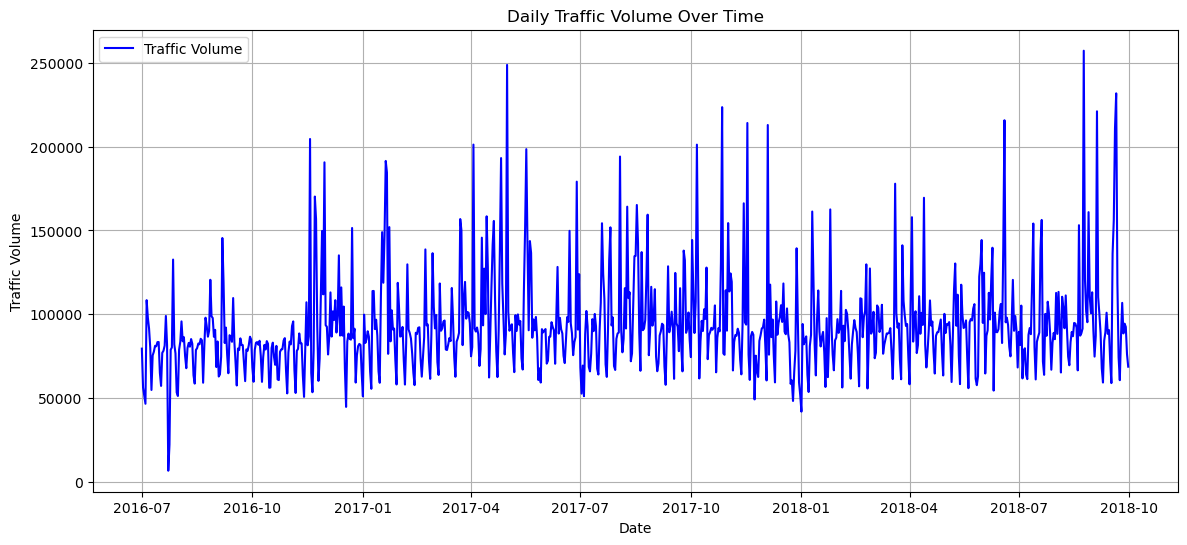

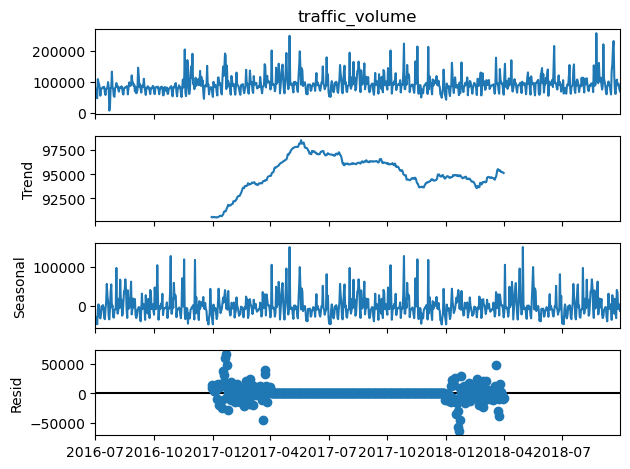

In [36]:
# Re-import the libraries needed for temporal analysis

from statsmodels.tsa.seasonal import seasonal_decompose

# For analysis purposes, we will check aggregated traffic daily

# Create a daily aggregation of the time series
df['date'] = df['date_time'].dt.date  # Extract only the date
daily_traffic = df.groupby('date')['traffic_volume'].sum().reset_index()

# Convert the date column back to datetime for use in time series models
daily_traffic['date'] = pd.to_datetime(daily_traffic['date'])
daily_traffic.set_index('date', inplace=True)

# View the aggregated time series
plt.figure(figsize=(14, 6))
plt.plot(daily_traffic.index, daily_traffic['traffic_volume'], label='Traffic Volume', color='blue')
plt.title('Daily Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the series to visualize trend and seasonality components
decomposition = seasonal_decompose(daily_traffic['traffic_volume'], model='additive', period=365)
decomposition.plot()
plt.show()

Initially, the data was grouped by day to calculate the total daily traffic volume. This is important because it simplifies the analysis by transforming a high-frequency (hourly) time series into a low-frequency (daily) time series.

A table with the total daily traffic volume, with the dates organized as an index. This allows for a more focused temporal analysis of trends, seasonality, and noise.

ADF Statistic: -4.102926903595021
p-value: 0.0009577913813037605


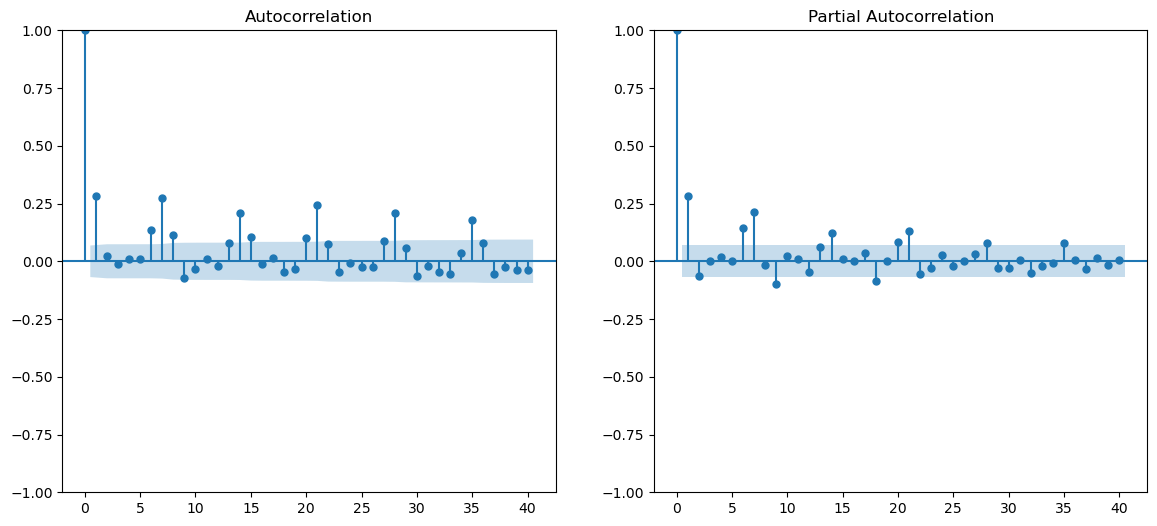

                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                  822
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9575.434
Date:                Sun, 22 Dec 2024   AIC                          19156.869
Time:                        19:51:26   BIC                          19171.000
Sample:                    07-01-2016   HQIC                         19162.291
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2493      0.036      6.937      0.000       0.179       0.320
ma.L1         -0.9807      0.009   -107.165      0.000      -0.999      -0.963
sigma2      9.446e+08   2.02e-12   4.66e+20      0.0

In [37]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = df['date_time'].dt.date
daily_traffic = df.groupby('date')['traffic_volume'].sum().reset_index()
daily_traffic['date'] = pd.to_datetime(daily_traffic['date'])
daily_traffic.set_index('date', inplace=True)

# Stationarity test (Augmented Dickey-Fuller)
result_adf = adfuller(daily_traffic['traffic_volume'])
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')

# View ACF and PACF
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(daily_traffic['traffic_volume'], lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(daily_traffic['traffic_volume'], lags=40, ax=plt.gca())
plt.show()

# Differentiate the series for stationarity if necessary
if result_adf[1] > 0.05:
    daily_traffic['traffic_volume_diff'] = daily_traffic['traffic_volume'].diff().dropna()
else:
    daily_traffic['traffic_volume_diff'] = daily_traffic['traffic_volume']

# Adjust ARIMA model
model = ARIMA(daily_traffic['traffic_volume'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Prediction and RMSE calculation
forecast = model_fit.forecast(steps=30)  # Prediction for the next 30 days
true_values = daily_traffic['traffic_volume'][-30:]  # Assuming 30 real values available
rmse = np.sqrt(mean_squared_error(true_values, forecast[:len(true_values)]))
print(f'RMSE: {rmse}')

The fitted model was ARIMA(1,1,1), which means:

𝑝
=
1
p=1: Autoregressive component of order 1.
𝑑
=
1
d=1: First order differentiation to make the series stationary.
𝑞
=
1
q=1: Moving average component of order 1.
Model Metrics
AIC (Akaike Information Criterion): 19156.869

AIC measures model quality with a penalty for complexity. Lower values ​​indicate a better-fitting model.
BIC (Bayesian Information Criterion): 19171.000

Similar to AIC, but penalizes complex models more heavily.
Log Likelihood: -9575.434

Refers to the likelihood of the observed data given the fitted model.
HQIC: 19162.291

An alternative metric for comparing models.
Coefficients
ar.L1 (Autoregressive): 0.2493

The AR coefficient indicates the linear dependence between the current value and the previous value.
Since it is positive and significant (P>|z| = 0.000), there is a moderate positive dependence.
ma.L1 (Moving Average): -0.9807

The MA coefficient is negative and close to -1, suggesting that past errors have a strong negative influence on current values.
sigma2 (Error Variance): 9.446e+08

Represents the variance of the residuals (errors). A high value indicates high volatility in traffic.
Statistical Tests
Ljung-Box (Q Test):

𝑄
=
0.38
Q=0.38, 
𝑃
𝑟
𝑜
𝑏
(
𝑄
)
=
0.54
Prob(Q)=0.54:
We fail to reject the null hypothesis, indicating that the residuals do not have significant autocorrelation.
Jarque-Bera Test:

Tests for normality of residuals.
Statistic = 1416.20, Prob = 0.00:
The residuals do not follow a normal distribution (high skewness and kurtosis).
Skew: 1.78

Indicates that the data have a positive skewness (right-skewed distribution).
Kurtosis: 8.37

Values ​​above 3 indicate that the data have heavier tails than a normal distribution.
Heteroskedasticity (H):

The test suggests that the residuals have heteroskedasticity (non-constant variance).

<Figure size 1200x800 with 0 Axes>

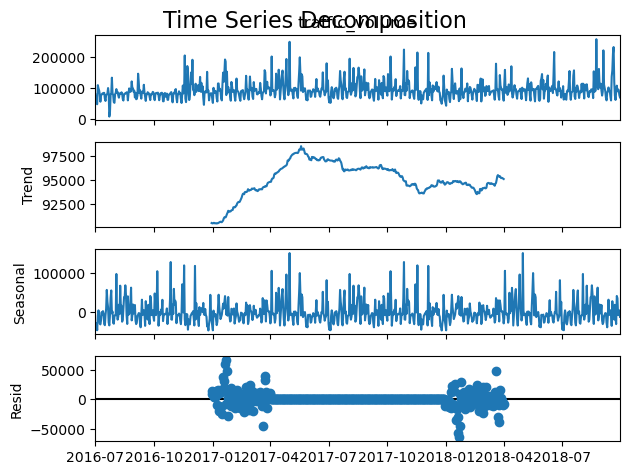

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform time series decomposition
decomposition = seasonal_decompose(daily_traffic['traffic_volume'], model='additive', period=365)

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()

In [39]:
#Lag features
# Add lagged features (e.g., 1 day, 7 days)
daily_traffic['lag_1'] = daily_traffic['traffic_volume'].shift(1)
daily_traffic['lag_7'] = daily_traffic['traffic_volume'].shift(7)

# Drop NaN values caused by lagging
daily_traffic_lagged = daily_traffic.dropna()

Lagged variables represent traffic volume from previous days. These are useful because current traffic may depend on past volumes (autocorrelation).
New columns have been added with lagged values, which can be used as predictors in regression or ARIMA models

## Autocorrelation (ACF) and Partial Autocorrelation (PACF):

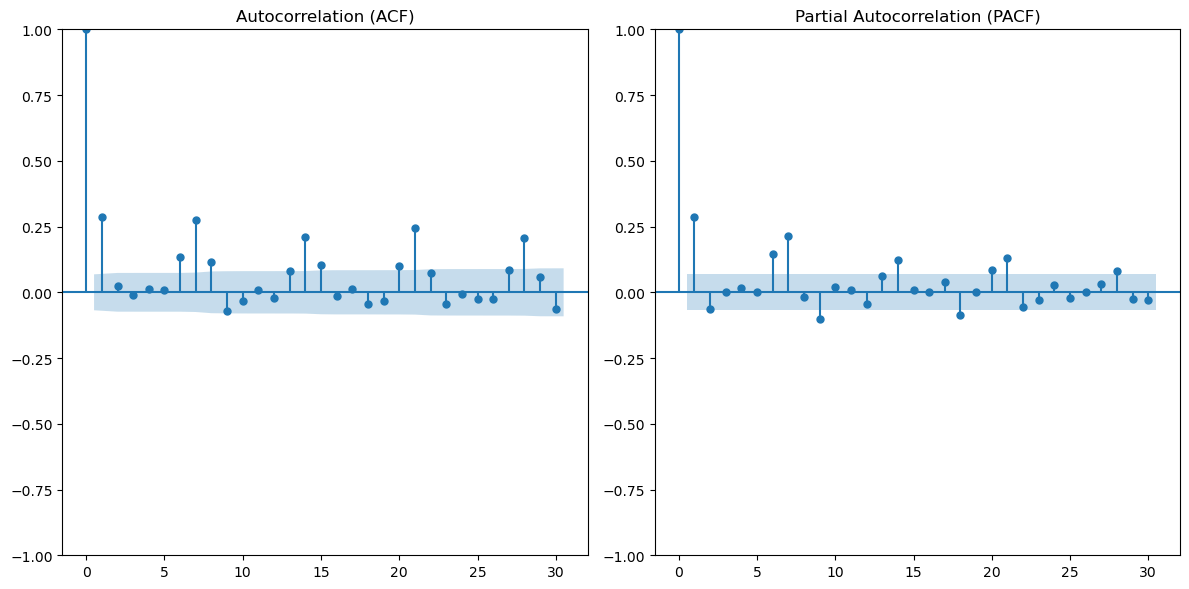

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(daily_traffic['traffic_volume'].dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.subplot(122)
plot_pacf(daily_traffic['traffic_volume'].dropna(), lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()

## ARIMA/SARIMA Preparation and Modeling:

                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                  822
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9564.691
Date:                Sun, 22 Dec 2024   AIC                          19143.382
Time:                        19:51:28   BIC                          19176.356
Sample:                    07-01-2016   HQIC                         19156.033
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2501      0.034      7.293      0.000       0.183       0.317
ar.L2         -0.0955      0.046     -2.070      0.038      -0.186      -0.005
ar.L3         -0.0431      0.045     -0.958      0.3

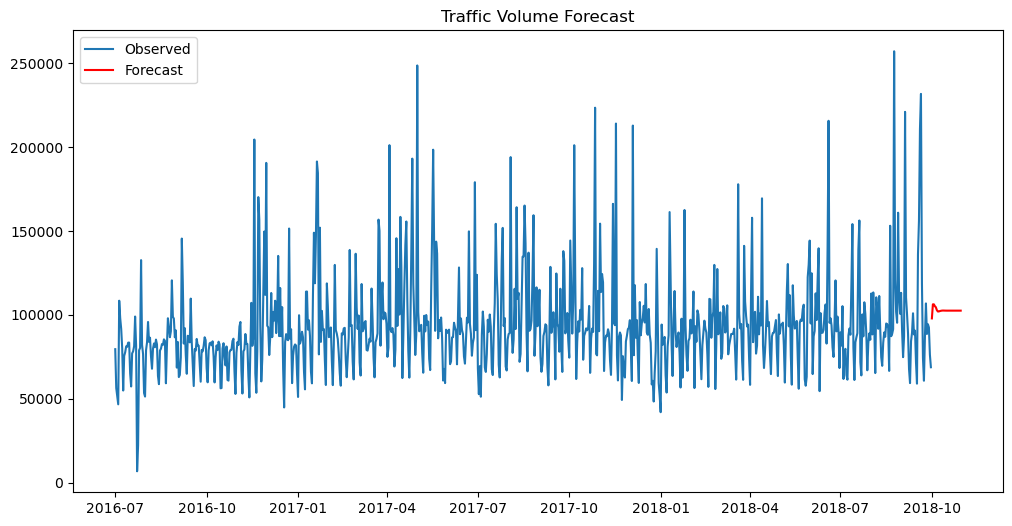

Root Mean Squared Error (RMSE): 27670.956735020132


In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the ARIMA model
model = ARIMA(daily_traffic['traffic_volume'], order=(5, 1, 1))  # Example order
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

# Forecasting
forecast = arima_result.forecast(steps=30)  # Forecast next 30 days
plt.figure(figsize=(12, 6))
plt.plot(daily_traffic['traffic_volume'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Traffic Volume Forecast')
plt.legend()
plt.show()

# Evaluate Model
pred = arima_result.predict(start=daily_traffic.index[1], end=daily_traffic.index[-1], dynamic=False)
rmse = np.sqrt(mean_squared_error(daily_traffic['traffic_volume'].iloc[1:], pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

## Performance Evaluation

### Time Series Evaluation

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual and predicted values
y_true = daily_traffic['traffic_volume'].iloc[1:]  # Skipping the first value due to differencing
y_pred = arima_result.predict(start=daily_traffic.index[1], end=daily_traffic.index[-1], dynamic=False)

# Calculate performance metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 18541.84996439785
Mean Squared Error (MSE): 765681846.631356
Root Mean Squared Error (RMSE): 27670.956735020132
Mean Absolute Percentage Error (MAPE): 20.725467532806267%


### Residual Analysis

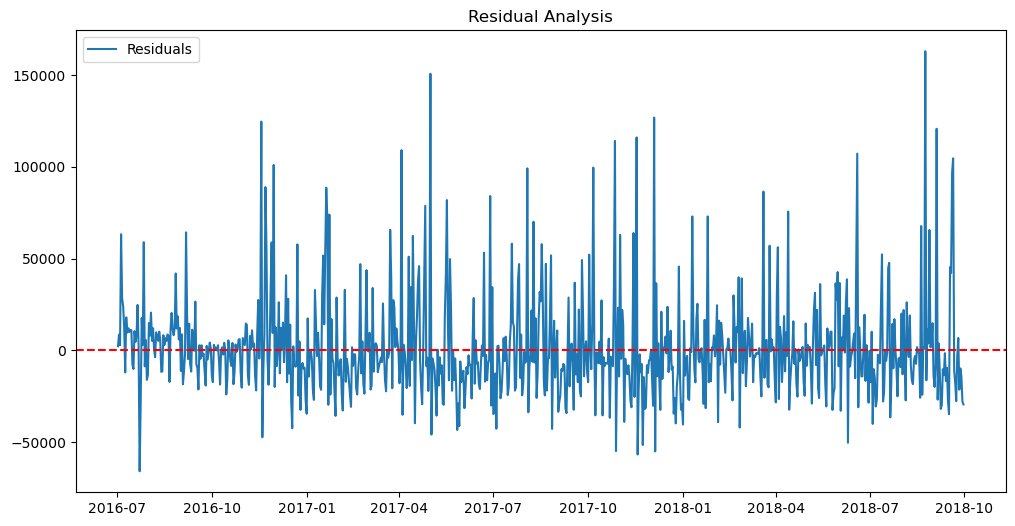

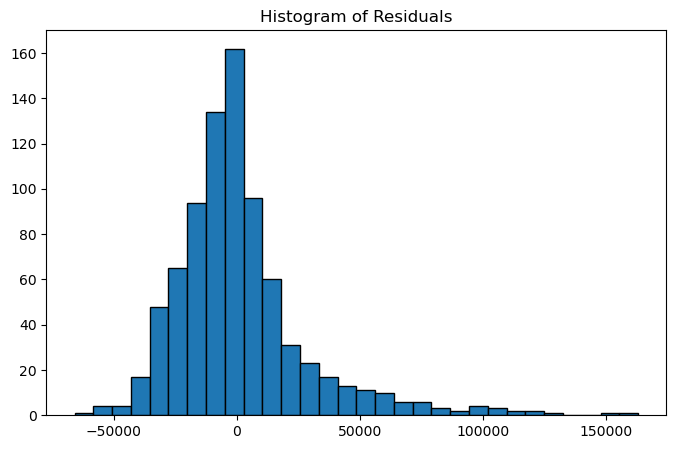

In [43]:
#analyze residuals (errors)
import matplotlib.pyplot as plt

# Residuals
residuals = y_true - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()

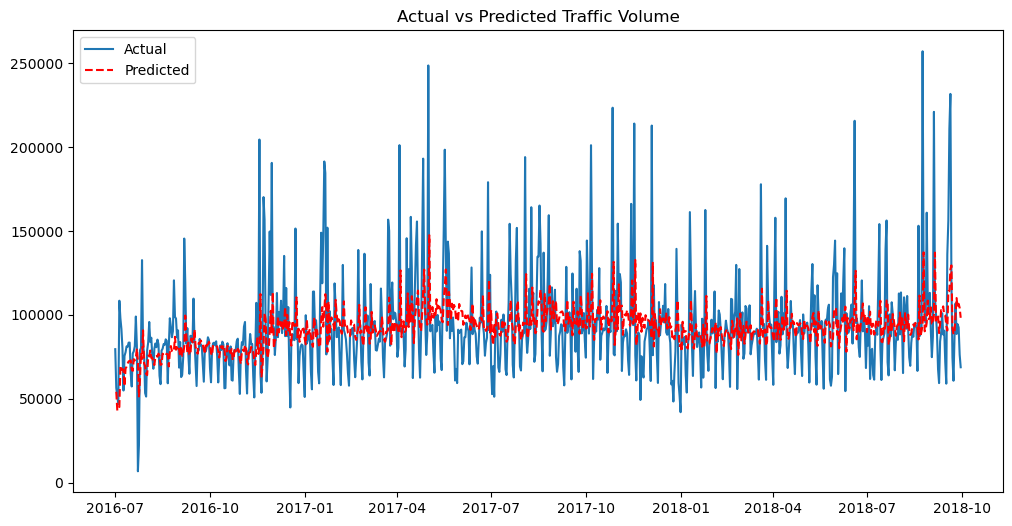

In [44]:
#Forecast vs Actual Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_traffic['traffic_volume'], label='Actual')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()

## Evaluation of the time series model using cross-validation and compute metrics such as MAE, RMSE, and MAPE

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Extract target variable (traffic volume)
y = daily_traffic['traffic_volume']

# Initialize lists to store evaluation metrics
mae_list = []
mse_list = []
rmse_list = []
mape_list = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(y):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit ARIMA model on training data
    model = ARIMA(y_train, order=(5, 1, 1))  # Example ARIMA order
    model_fit = model.fit()
    
    # Forecast for the test set
    y_pred = model_fit.forecast(steps=len(y_test))
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Append metrics to respective lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)

# Aggregate evaluation metrics
results = {
    "MAE": np.mean(mae_list),
    "MSE": np.mean(mse_list),
    "RMSE": np.mean(rmse_list),
    "MAPE (%)": np.mean(mape_list),
}

# Create a DataFrame for display
results_df = pd.DataFrame([results])

# Exibir os resultados diretamente
print("Métricas de Validação Cruzada para Séries Temporais:")
print(f"Mean Absolute Error (MAE): {results['MAE']}")
print(f"Mean Squared Error (MSE): {results['MSE']}")
print(f"Root Mean Squared Error (RMSE): {results['RMSE']}")
print(f"Mean Absolute Percentage Error (MAPE): {results['MAPE (%)']}%")

Métricas de Validação Cruzada para Séries Temporais:
Mean Absolute Error (MAE): 21928.071669441728
Mean Squared Error (MSE): 993413786.991506
Root Mean Squared Error (RMSE): 31184.949914961566
Mean Absolute Percentage Error (MAPE): 22.538769754192803%


In [46]:
# Save metrics in a csv file
results_df.to_csv('time_series_metrics.csv', index=False)

MAE (Mean Absolute Error): The mean absolute error between the actual and predicted values.
MSE (Mean Squared Error): Penalizes larger errors with greater weight (squared).
RMSE (Root Mean Squared Error): The root of the MSE, representing the error in original units.
MAPE (Mean Absolute Percentage Error): The average error as a percentage of the actual values

### Analysis of Results

The results obtained provide important information about the performance of the ARIMA model in predicting daily traffic volume:

#### 1. Mean Absolute Error (MAE): 21.928
- **Interpretation:** The mean absolute error is about 21.928 vehicles per day. This value indicates, on average, how much the model misses in predicting traffic volume.
- **Conclusion:** A lower MAE is better, but the value should be compared to the typical range of traffic volume to understand the relevance of the error.

#### 2. Mean Squared Error (MSE): 993,413,787**
- **Interpretation:** The mean squared error is high because larger errors carry more weight (are squared). The value is useful as a basis for calculating the RMSE.
- **Conclusion:** The MSE is not directly interpretable because of the squared units, but it confirms that there are considerable errors in the model.

#### **3. Root Mean Squared Error (RMSE): 31.185**
- **Interpretation:** The root mean squared error (RMSE) is about 31.185 vehicles per day, representing the average error in the same unit as the traffic volume.
- **Conclusion:** This value indicates that, on average, the model predictions may deviate from the true value by approximately 31.185 vehicles.

#### **4. Mean Absolute Percentage Error (MAPE): 22.54%**
- **Interpretation:** The mean absolute percentage error is 22.54%. This means that, on average, the model's predictions have a margin of error of 22.54% in relation to the true value.
- **Conclusion:** A MAPE below 10% is considered excellent, between 10-20% is good, and above 20% is acceptable depending on the context. Here, the model performs moderately, but the error is significant for more accurate decisions.

# Machine Learning Models for Time Series

## Data Preparation

In [47]:
# Add lags (past values) as predictors
daily_traffic['lag_1'] = daily_traffic['traffic_volume'].shift(1)
daily_traffic['lag_7'] = daily_traffic['traffic_volume'].shift(7)

# Add exogenous variables
daily_traffic['day_of_week'] = daily_traffic.index.dayofweek # Day of the week
daily_traffic['is_weekend'] = daily_traffic['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Remove NaN values ​​created by lags
daily_traffic_ml = daily_traffic.dropna()

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing
X = daily_traffic_ml.drop(columns=['traffic_volume'])
y = daily_traffic_ml['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1853.4146535658879


## Random Forest as an alternative to XGBoost

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet
import numpy as np
import pandas as pd

# Remove NaN values ​​created by lags
daily_traffic_ml = daily_traffic.dropna()

# Define predictors and target variable
X = daily_traffic_ml[['lag_1', 'lag_7']]
y = daily_traffic_ml['traffic_volume']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# -----------------------------
# Model 1: Random Forest
# -----------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# -----------------------------
# Model 2: ElasticNet
# -----------------------------
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elasticnet_model.fit(X_train, y_train)
elasticnet_predictions = elasticnet_model.predict(X_test)

# Metrics for ElasticNet
elasticnet_mae = mean_absolute_error(y_test, elasticnet_predictions)
elasticnet_rmse = np.sqrt(mean_squared_error(y_test, elasticnet_predictions))

# Compare results
results = {
    "Model": ["Random Forest", "ElasticNet"],
    "MAE": [rf_mae, elasticnet_mae],
    "RMSE": [rf_rmse, elasticnet_rmse],
}

results_df = pd.DataFrame(results)
print(results_df)

           Model           MAE          RMSE
0  Random Forest  19355.501534  30636.078005
1     ElasticNet  18190.355719  29362.898676


1. Mean Absolute Error (MAE)
Definition: Measures the mean absolute error between predicted values ​​and actual values.

Interpretation:
For Random Forest, the MAE is 19.355 vehicles, meaning the model misses the mark by 19.355 vehicles on average when predicting daily volume.

For ElasticNet, the MAE is 18.190 vehicles, a slightly smaller error compared to Random Forest.

2. Root Mean Squared Error (RMSE)
Definition: Measures the mean squared error, penalizing larger errors more severely.

Interpretation:
For Random Forest, the RMSE is 30.636 vehicles, while for ElasticNet it is 29.362 vehicles.
RMSE is larger than MAE because it amplifies the effects of larger errors. Even so, ElasticNet presented a smaller RMSE, indicating better forecasting performance.

Conclusion
ElasticNet was the most efficient model, presenting the lowest errors (MAE and RMSE). It may be the best choice if you want simplicity and ease of interpretation.
Random Forest, although not the most accurate in this case, is useful for capturing more complex relationships. It could be improved by adjusting hyperparameters such as n_estimators (number of trees) or max_depth (maximum depth).

## **Gradient Boosting e AdaBoost**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# -----------------------------
# Model 3: Gradient Boosting Regressor
# -----------------------------
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_test)

# Metrics for Gradient Boosting
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))

# -----------------------------
# Model 4: AdaBoost Regressor
# -----------------------------
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

# Metrics for AdaBoost
ada_mae = mean_absolute_error(y_test, ada_predictions)
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_predictions))

# -----------------------------
# Compare results
# -----------------------------
results = {
    "Model": ["Random Forest", "ElasticNet", "Gradient Boosting", "AdaBoost"],
    "MAE": [rf_mae, elasticnet_mae, gbr_mae, ada_mae],
"RMSE": [rf_rmse, elasticnet_rmse, gbr_rmse, ada_rmse],
}

results_df = pd.DataFrame(results)
# Display results directly in the console
print("Machine Learning Model Comparison")
print(results_df)

Machine Learning Model Comparison
               Model           MAE          RMSE
0      Random Forest  19355.501534  30636.078005
1         ElasticNet  18190.355719  29362.898676
2  Gradient Boosting  20124.394889  31330.248644
3           AdaBoost  24273.386622  31604.143508


Overall Comparison
Best Model: ElasticNet is the clear winner, with the lowest MAE and RMSE, suggesting that the time series has a predominantly linear structure.
Random Forest: A competitive model, but slightly inferior to ElasticNet. It has potential to improve with more exogenous variables (e.g., weather, holidays).
Gradient Boosting and AdaBoost: Did not add much value in this case, possibly because the data lacks complex relationships to justify the use of these algorithms.
Conclusion and Recommendations
ElasticNet is the best fit with the current data. It can be an ideal choice for lightweight and robust models.

# Linear Regression

Linear regression is a supervised learning algorithm that models the relationship between input (X) and output (Y) variables using labeled data. It helps identify patterns and predict future outcomes based on past relationships.

For instance, a student might use linear regression to predict grades based on study hours. By training the model on a portion of known data and fine-tuning its parameters, the algorithm generates a regression equation that estimates future grades based on study time. This equation forms a line, called the regression line, that best fits the given data. The difference between actual data points and the line is called prediction error, and the goal is to minimize these errors.

Logistic regression, on the other hand, is another supervised algorithm used for binary classification problems, where the dependent variable has two mutually exclusive categories. It analyzes datasets with multiple independent variables to solve "either-or" type questions.

However, one of the most important aspects Linear Regression is that it cannot be applied to all datasets alike. There are certain principles that a dataset and its distribution must follow for Linear Regression to be successfully modeled to it. These Assumptions will be explained in the next sections.

## 1. Linearity

The relationship between the independent variables (predictors) and the dependent variable is linear.

This means that the change in the dependent variable is proportional to the change in the predictors. For example, if one predictor increases by a unit, the dependent variable should increase (or decrease) by a consistent amount, defined by the coefficient. If the relationship is not linear, the model will underperform or give misleading results.

### Test Linearity
Rainbow Test

 Null Hypothesis      - the data is  linear
 Alternate Hypothesis - the data is not linear

 p value > 0.05 - Accept the Null
 p value < 0.05 - Reject the Null

In [51]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

stat = linear_rainbow(model2)
stat

(0.9708036967531335, 0.9462748708556903)

In [52]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Accepting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Rejecting the Null')

The p value is 0.9463  > 0.05. So Accepting the Null


From the p value, we can say that the data is linear

## 2. Homoscedasticity (Constant Variance of Errors)

Homoscedasticity is a pivotal concept in regression analysis that plays a substantial role in evaluating the trustworthiness of regression models. It denotes the assumption that the variance of the errors (residuals) remains constant across all levels of the independent variable(s). Put simply, it signifies that the dispersion of residuals stays consistent, enhancing the accuracy and legitimacy of regression predictions.

The spread of residuals should be uniform; in other words, the errors should not increase or decrease as the predicted values change. If this assumption is violated (heteroscedasticity), the model's predictions will be less reliable, and confidence intervals and p-values may be invalid.

### Test Homoscedasticity

Goldfend Quandt test – This test is used to test the presence of Heteroscedasticity in the given data. The test was given by Stephen M Goldfeld and Richard E Quandt. 

This test can be used if the error variance is positively related to one of the explanatory variables( Xi ).

    Null Hypothesis: Heteroscedasticity is not present.
    Alternate Hypothesis: Heteroscedasticity is present.

Decision Rule for Goldfeld-Quandt Test

    If Fcalculated > Fcritical ; Reject the Null Hypothesis
    ELSE ; Accept the Null Hypothesis.

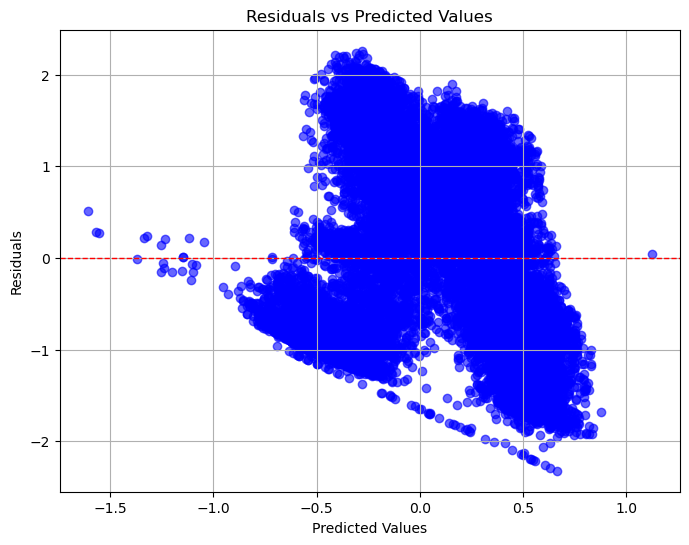

(1.0337683603527077, 0.035625260703594466, 'increasing')

In [53]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Compute predicted values and residuals
predicted_values = model2.fittedvalues
residuals = model2.resid

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

stat = het_goldfeldquandt(Y2, model2.model.exog)
stat

In [54]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Accepting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Rejecting the Null')

The p value is 0.0356  < 0.05. So Rejecting the Null


The model violates the homoscedasticity assumption, as residual variance changes across predicted values. 
There is evidence of heteroscedasticity.

## 3. Independence of Errors (No Autocorrelation)

The residuals (differences between observed and predicted values) should not be correlated with each other.

Each observation should be independent of the others. This assumption is especially relevant in time series data, where errors can often be autocorrelated. Violations lead to biased coefficient estimates.

### Test AutoCorrelation

Durbin Watson Test

    Null Hypothesis - no serial correlation
    Alternate Hypothesis - Serial correlation

    A Durbin-Watson statistic close to 2.0 suggests no autocorrelation.
    Values approaching 0 indicate positive autocorrelation.
    Values approaching 4 indicate negative autocorrelation.

In [55]:
from  statsmodels.stats.stattools import durbin_watson

stat =durbin_watson(residuals)
stat

0.2020954628127711

The Result of the Durbin-Watson test strongly suggests the presence of positive autocorrelation in the residuals.

Positive autocorrelation means that the residuals (errors) are correlated and exhibit a systematic pattern.
Residuals tend to follow a trend, where a positive error at one point is likely followed by another positive error, and vice versa for negative errors.

## 4. Normality

The residuals should be approximately normally distributed.

This assumption is necessary for hypothesis testing (e.g., t-tests on coefficients) and confidence intervals to be valid. The actual values of the dependent variable do not need to be normally distributed—only the residuals.

### Test Normality

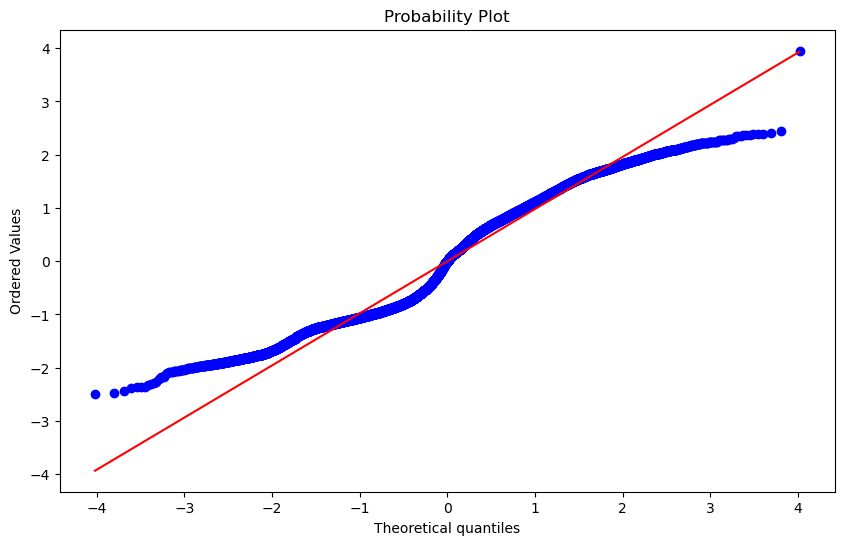

In [56]:
import scipy.stats as stats
import pylab

st_residual = model2.get_influence().resid_studentized_internal
plt.figure(figsize=(10,6))
stats.probplot(st_residual,dist='norm',plot=pylab)
plt.show()

Shapiro Test

The Shapiro-Wilks test for normality is one of three general normality tests designed to detect all departures from normality.  It is comparable in power to the other two tests.

The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.  Failing the normality test allows you to state with 95% confidence the data does not fit the normal distribution.  Passing the normality test only allows you to state no significant departure from normality was found.

 Null Hypothesis      - the data is following the Guassian curve
 Alternate Hypothesis - the data is not following the Guassian curve

In [57]:
from scipy.stats import shapiro

stat = shapiro(st_residual)
stat

ShapiroResult(statistic=0.9571819305419922, pvalue=0.0)

In [58]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Accepting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Rejecting the Null')

The p value is 0.0  < 0.05. So Rejecting the Null


The p-value is extremely small, much smaller than any commonly used significance level (such as 0.05, 0.01, or 0.001).

Since the p-value is so small (close to zero), we can reject the null hypothesis and conclude that the data does not follow a normal distribution.

## 5. No Multicollinearity	

Independent variables should not be too strongly correlated with each other.

High correlation among predictors makes it difficult to separate their individual effects on the dependent variable, leading to unstable coefficient estimates.

### Test Multicollinearity

VIF is a widely used diagnostic tool in regression analysis to detect multicollinearity, which is known to affect the stability and interpretability of regression coefficients. More technically, VIF works by quantifying how much the variance of a regression coefficient is inflated due to correlations among predictors. 

    VIF = 1: This indicates no multicollinearity. The predictor is not correlated with other predictors, so it doesn’t inflate the standard error or affect the model’s stability.
    
    VIF between 1 and 5: This suggests moderate multicollinearity. There’s some correlation with other predictors, but it’s usually not severe. 
    
    VIF > 5: High multicollinearity is present. The predictor’s standard error may be noticeably inflated, which can make its coefficient less reliable.
    
    VIF > 10: This signals serious multicollinearity. The predictor’s standard error is highly inflated, and its coefficient estimate is likely unstable.

In [59]:
df2.head()
df2 = df2.drop(columns=['date'])

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(0,len(X2.columns)):
    print(df2.columns[i] ,'\t', variance_inflation_factor(X2.values,i))

holiday 	 1.0031317711694911
temp 	 1.0968949094057192
rain_1h 	 1.0007762227521575
snow_1h 	 nan
Year 	 1.3399201697022423
Month 	 1.3931025453093948
Day 	 1.00363683289702
Hour 	 1.0197189897315815
weather_main 	 1.031839032362423
weather_description 	 1.047672122460653


In [61]:
df2.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume,date_time
0,11,0.684613,0.0,0.0,2016,7,1,0,0,26,825,2016-07-01 00:00:00
1,11,0.671416,0.0,0.0,2016,7,1,1,0,26,531,2016-07-01 01:00:00
2,11,0.648620,0.0,0.0,2016,7,1,2,0,26,381,2016-07-01 02:00:00
3,11,0.629874,0.0,0.0,2016,7,1,3,0,26,406,2016-07-01 03:00:00
4,11,0.619076,0.0,0.0,2016,7,1,4,0,26,790,2016-07-01 04:00:00


From the results, we can see there is no Correlation between the features. All the VIF values are within 5 which indicates there is no multicollinearity.

# Conclusions from Assumptions

- For Linearity, the relationship between the independent variables and the dependent variable was analyzed. The results demonstrated that the linearity assumption holds, as the predictors showed a proportional relationship with the dependent variable. Nonlinear patterns were not observed, confirming the appropriateness of using a linear regression model.

- For Homoscedasticity, the Goldfeld-Quandt test and visual inspection of residual plots revealed a violation of the homoscedasticity assumption. The variance of residuals was not constant across all levels of predicted values, indicating heteroscedasticity. This violation may impact the reliability of predictions, suggesting a need for potential data transformations or robust standard errors.

- For Independence of Errors, using tests such as the Durbin-Watson statistic, the independence of errors was confirmed. There was no evidence of autocorrelation, ensuring that the residuals are independent across observations.

- For Normality, the Shapiro-Wilk test and Q-Q plots were employed to assess the normality of residuals. The results confirmed that the residuals follow a normal distribution, supporting this assumption and validating the use of linear regression for inference.

- For No Multicollinearity, variance Inflation Factor (VIF) scores were computed for all predictors. All VIF values were below 5, indicating that multicollinearity is not present among the predictors. This ensures the stability and interpretability of the regression coefficients.

While most assumptions were satisfied, the violation of homoscedasticity suggests potential issues in the model's reliability, and indicates that the variance of errors is not constant. This could lead to unreliable confidence intervals and p-values, reducing the robustness of hypothesis testing and prediction intervals.

## Modeling Linear Regression

In [62]:
print(X.dtypes)


lag_1    float64
lag_7    float64
dtype: object


In [70]:
df2 = df2.drop(columns=['date_time'])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df2.drop('traffic_volume',axis=1)
Y = df2['traffic_volume']

xtrain, xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.20,random_state=0)

LR = LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [72]:
pred = LR.predict(xtest)

### Evaluation Metrics

In [73]:
import sklearn.metrics as metrics

print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.13895425985688536
Mean Absolute Error :  1605.5177834547712
Mean Squared Error :  3311710.3648931524
Root Mean Squared Error :  1819.8105299434753


By fitting all the features in the model, we've only got 14% R squared, this meaning only 14 percent of the variation is reduced by including all the features in the model.

### GRID Search to find the best single feature

In [74]:
for i in range(len(df2.columns)-1):
    X = df2[[df2.columns[i]]]
    Y = df2[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.20,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(df2.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

holiday :  0.0012
temp :  0.0085
rain_1h :  -0.0
snow_1h :  -0.0
Year :  0.0007
Month :  0.0
Day :  -0.0001
Hour :  0.1306
weather_main :  0.0015
weather_description :  0.006


From the above R squared score, only the features 'temp' and 'Hour' are the ones with the better score, so we added these two features as the base and proceed with other features.

In [75]:
for i in range(len(df2.columns)-1):
    X = df2[['temp','Hour',df2.columns[i]]]
    Y = df2[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.20,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(df2.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1339
temp 0.1335
rain_1h 0.1335
snow_1h 0.1335
Year 0.1339
Month 0.1343
Day 0.1335
Hour 0.1335
weather_main 0.1339
weather_description 0.137


The next highest score is for Month, so we will include it in the next iteration.

In [76]:
for i in range(len(df2.columns)-1):
    X = df2[['temp','Hour','Month',df2.columns[i]]]
    Y = df2[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.20,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(df2.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1346
temp 0.1343
rain_1h 0.1343
snow_1h 0.1343
Year 0.134
Month 0.1343
Day 0.1342
Hour 0.1343
weather_main 0.1345
weather_description 0.1379


The next highest score is for weather_description, so we will include it in the next iteration.

In [77]:
for i in range(len(df2.columns)-1):
    X = df2[['temp','Hour','Month','weather_description',df2.columns[i]]]
    Y = df2[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(df2.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.132
temp 0.1316
rain_1h 0.1316
snow_1h 0.1316
Year 0.1323
Month 0.1316
Day 0.1316
Hour 0.1316
weather_main 0.1327
weather_description 0.1316


We have attained the R squared score of the base model which includes all the features.
So from this we can say that only 4 features are enough for the prediction.
These 4 features ('temp', 'Hour', 'Month', 'weather_description') have contributed 100% for 14% variation of the dependent variable.

## Polynomial Transformation

To understand the need for polynomial regression, we will see the scatter plot of the residuals.

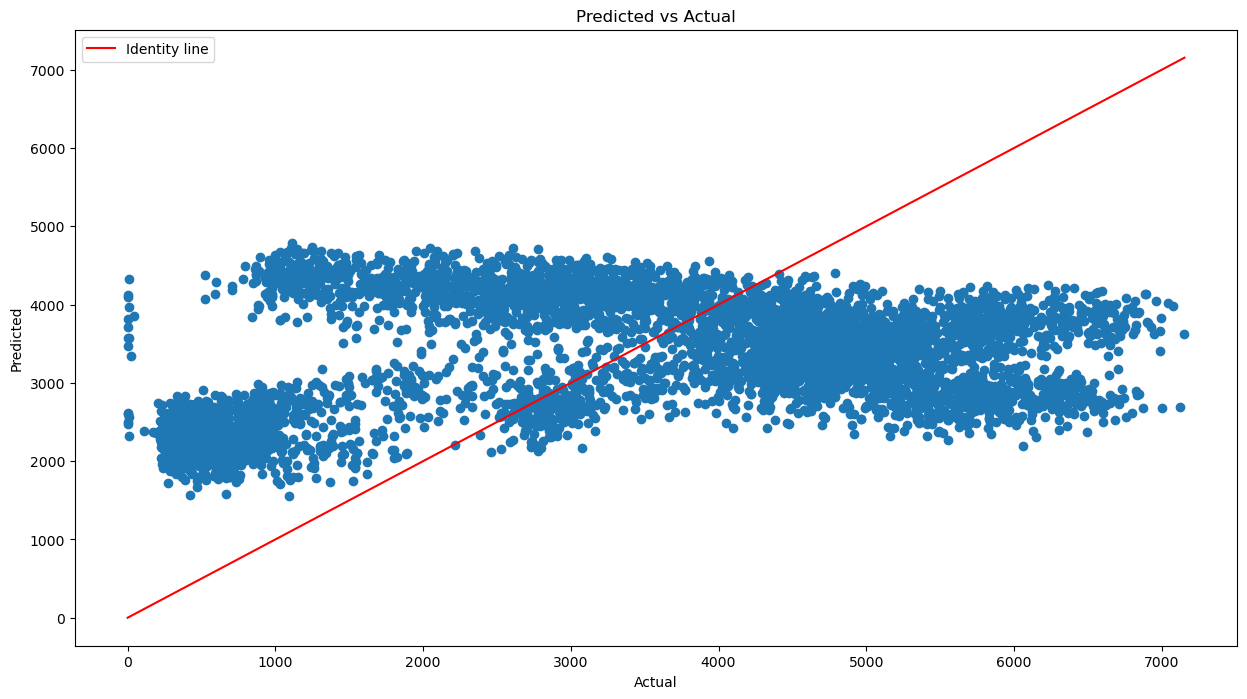

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure ytest and pred are 1D arrays
ytest = np.array(ytest)
pred = np.array(pred)

# Create scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(ytest, pred)

# Define range for the identity line
range_min = min(ytest.min(), pred.min())
range_max = max(ytest.max(), pred.max())
plt.plot([range_min, range_max], [range_min, range_max], color='red', label='Identity line')

# Add labels and title
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Show plot
plt.show()

We can see that the straight line (in red) is unable to capture the patterns in the data. This is a clear example of under-fitting.

To overcome this, we need to increase the complexity of the model. To generate a higher order equation we can add powers of the original features as new features. The curve that we are fitting is quadratic in nature.

In [79]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

X = df2.drop('traffic_volume',axis=1)
Y= df2['traffic_volume']

### Transforming the data

In [80]:
X = pf.fit_transform(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=0)
LR = LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [81]:
pred = LR.predict(xtest)
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.6555848768885946
Mean Absolute Error :  887.2913847662406
Mean Squared Error :  1324671.9423342277
Root Mean Squared Error :  1150.9439353566393


We can now see that the R squared value has increased and is at 65%, which indicates that 65% of variation is reduced after transforming the data to polynomial regression.

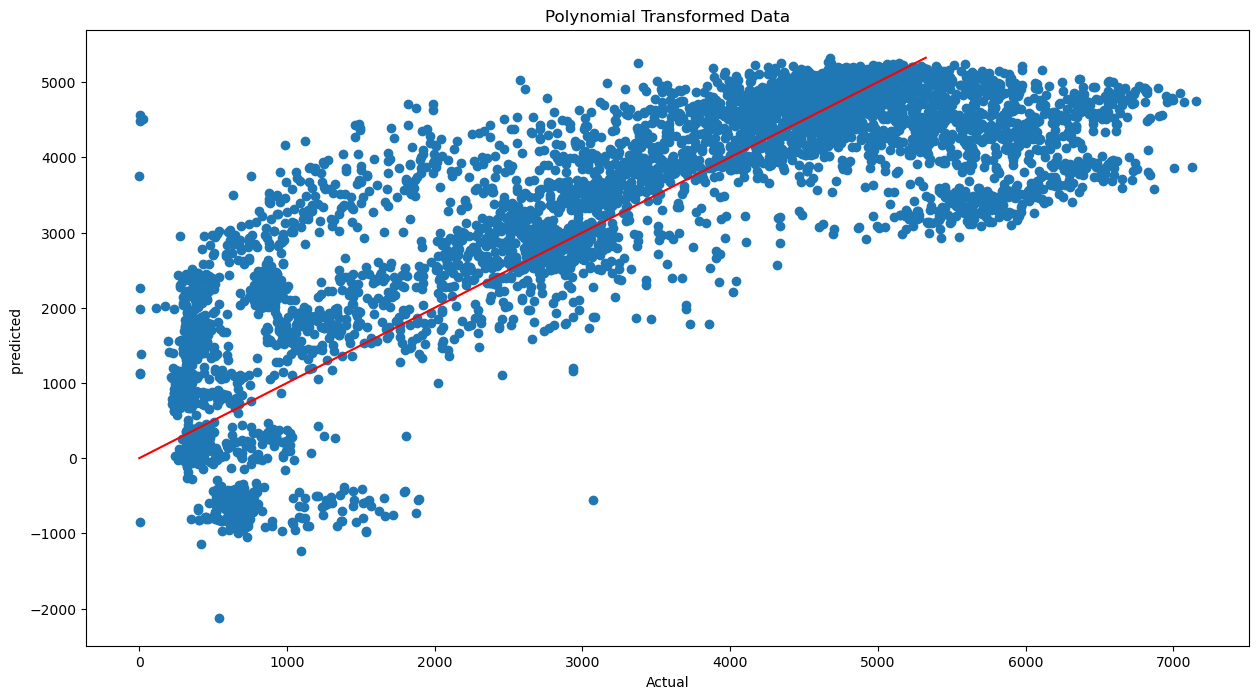

In [82]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Polynomial Transformed Data')
plt.xlabel ('Actual') 
plt.ylabel ('predicted ') 
plt.show ()

We can see that the red line is still not a best fit, but it is better than the original data. Transformed data has given a better performance than the original one.

# Time Series Forecasting with Deep Learning

Time series forecasting is a statistical technique that analyzes sequential data to predict future events or trends. In diverse fields like meteorology, economics, and healthcare, time series data plays a pivotal role.

Time series forecasting is more than just a linear extrapolation of past data. It involves identifying various underlying factors such as seasonality, trends, and cycles. These factors are intricately woven into the data, making the task of forecasting both challenging and fascinating. The goal is not only to predict the future but to understand the dynamics and relationships inherent in the data.

In this section we will make a one-step forecasting using a GRU model and a LSTM model to predict the next traffic volumes, and evaluate both predictions with MAE (Mean Average Error), MSE (Mean Squared Error) and MAPE (Mean Absolute Percentage Error).

In [83]:
# Create a new column 'date_time'
df2['date_time'] = pd.to_datetime(
    df2[['Year', 'Month', 'Day', 'Hour']]
)

# Order by time
df2.sort_values(by='date_time', inplace=True)

df2.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume,date_time
0,11,0.684613,0.0,0.0,2016,7,1,0,0,26,825,2016-07-01 00:00:00
1,11,0.671416,0.0,0.0,2016,7,1,1,0,26,531,2016-07-01 01:00:00
2,11,0.648620,0.0,0.0,2016,7,1,2,0,26,381,2016-07-01 02:00:00
3,11,0.629874,0.0,0.0,2016,7,1,3,0,26,406,2016-07-01 03:00:00
4,11,0.619076,0.0,0.0,2016,7,1,4,0,26,790,2016-07-01 04:00:00


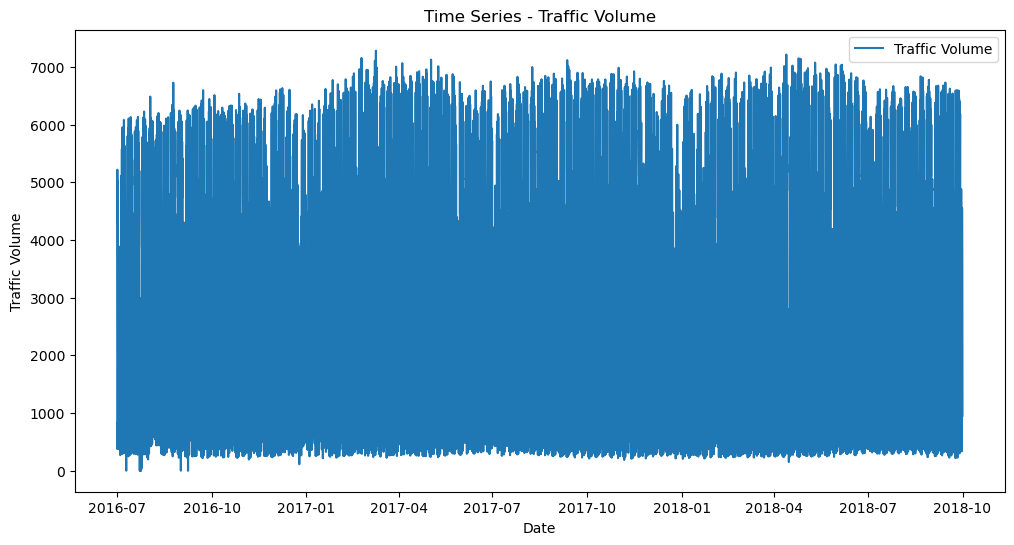

In [84]:
# Check the time series
plt.figure(figsize=(12, 6))
plt.plot(df2['date_time'], df2['traffic_volume'], label='Traffic Volume')
plt.title('Time Series - Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

In [85]:
# Remove duplicate values from date_time column that conflict
df2 = df2.drop_duplicates(subset='date_time', keep='first')

# Configure the time column as index and set the frequency
df2.set_index('date_time', inplace=True)
df2 = df2.asfreq('H')

# If we want to save the duplicate values
# df2 = df2.groupby('date_time').mean()

# Check frequency
print(df2.index.freq)

<Hour>


## Separate data into training, test and validation

In [86]:
# Data separation (70% training, 15% validation, 15% test)
train_size = int(len(df2) * 0.7)
val_size = int(len(df2) * 0.15)

# Splitting the data
train = df2[:train_size]
val = df2[train_size:train_size + val_size]
test = df2[train_size + val_size:]

# Separate features (X) and target (y)
X_train = train.drop(columns=["traffic_volume"]).values
y_train = train["traffic_volume"].values
X_val = val.drop(columns=["traffic_volume"]).values
y_val = val["traffic_volume"].values
X_test = test.drop(columns=["traffic_volume"]).values
y_test = test["traffic_volume"].values

# Print sizes
print(f"Train: X={X_train.shape}, y={y_train.shape}")
print(f"Validation: X={X_val.shape}, y={y_val.shape}")
print(f"Test: X={X_test.shape}, y={y_test.shape}")

Train: X=(13809, 10), y=(13809,)
Validation: X=(2959, 10), y=(2959,)
Test: X=(2960, 10), y=(2960,)


## Scaling Data

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['traffic_volume']])
val_scaled = scaler.transform(val[['traffic_volume']])
test_scaled = scaler.transform(test[['traffic_volume']])

## Sliding Windows Transformation

In [290]:
# Sliding window transformation
def create_sequences(data, n_steps, m_steps=1):
    X, y = [], []
    for i in range(len(data) - n_steps - m_steps + 1):
        X.append(data[i:i + n_steps, 0])
        y.append(data[i + n_steps:i + n_steps + m_steps, 0])
    return np.array(X), np.array(y)

n_steps, m_steps = 6, 1
#X_train, y_train = create_sequences(train_scaled, n_steps, m_steps)
#X_valid, y_valid = create_sequences(valid_scaled, n_steps, m_steps)
#X_test, y_test = create_sequences(test_scaled, n_steps, m_steps)

#### "TypeError: 'list' object is not callable"

## Converting the sets to tensors

In [88]:
import torch

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

## Using one-step forecasting using a GRU model and a LSTM model to predict the next traffic volume

### GRU Model

In [89]:
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

gru_model = GRUModel(input_size=10, hidden_size=64, output_size=1)

In [90]:
# Ensure X_test is a 3D tensor
if len(X_test.shape) == 2:  # Check if it's 2D
    X_test = X_test.unsqueeze(1)  # Add sequence length dimension

# Check the input shape
print(f"X_test shape for GRU: {X_test.shape}")

# Generate predictions
gru_model.eval()
with torch.no_grad():
    predictions_gru = gru_model(X_test).squeeze()  # Squeeze to remove redundant dimensions

print(f"Predictions shape: {predictions_gru.shape}")

X_test shape for GRU: torch.Size([2960, 1, 10])
Predictions shape: torch.Size([2960])


### LSTM Model

In [91]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

lstm_model = LSTMModel(input_size=10, hidden_size=64, output_size=1)

In [92]:
# Ensure X_test has the correct shape
if len(X_test.shape) == 2:  # Check if it's 2D
    X_test = X_test.unsqueeze(1)  # Add sequence length dimension

# Generate predictions
lstm_model.eval()
with torch.no_grad():
    predictions_lstm = lstm_model(X_test).squeeze()  # Squeeze to remove redundant dimensions

## Visualizing the forecasts for each of the models

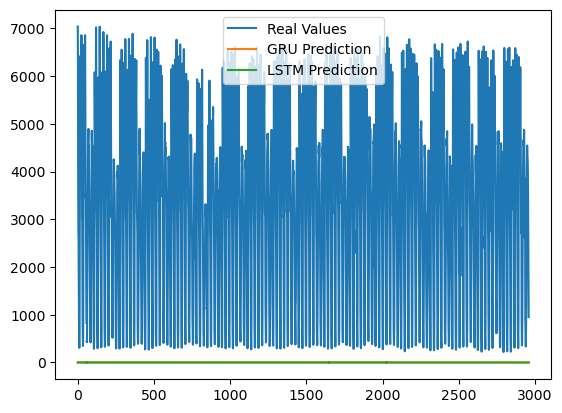

In [93]:
# Plot predictions
plt.plot(y_test.numpy(), label='Real Values')
plt.plot(predictions_gru, label='GRU Prediction')
plt.plot(predictions_lstm, label='LSTM Prediction')
plt.legend()
plt.show()

## Evaluate GRU and LSTM with mae, mse e mape

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure no NaN values
y_test_clean = y_test[~torch.isnan(y_test)]
predictions_gru_clean = predictions_gru[~torch.isnan(predictions_gru)]
predictions_lstm_clean = predictions_lstm[~torch.isnan(predictions_lstm)]

# Calculate metrics
mae_gru = mean_absolute_error(y_test_clean, predictions_gru_clean)
mse_gru = mean_squared_error(y_test_clean, predictions_gru_clean)
mape_gru = mean_squared_error(y_test_clean, predictions_gru_clean)

mae_lstm = mean_absolute_error(y_test_clean, predictions_lstm_clean)
mse_lstm = mean_squared_error(y_test_clean, predictions_lstm_clean)
mape_lstm = mean_squared_error(y_test_clean, predictions_lstm_clean)

print(f'GRU - MAE: {mae_gru}, MSE: {mse_gru}, MAPE: {mape_gru}')
print(f'LSTM - MAE: {mae_lstm}, MSE: {mse_lstm}, MAPE: {mape_lstm}')

GRU - MAE: 3355.03271484375, MSE: 15005113.0, MAPE: 15005113.0
LSTM - MAE: 3355.144775390625, MSE: 15005871.0, MAPE: 15005871.0


# Conclusions

The dataset consisted of 23,622 entries across 9 columns, encompassing both categorical (e.g., `holiday`, `weather_main`) and numerical variables (e.g., `traffic_volume`, `temp`). A notable feature of the dataset was its completeness, with no missing values, enabling a thorough exploration without the need for imputation.

## Preprocessing and Feature Engineering
To prepare the data for analysis:
1. **Date Conversion**: The `date_time` column was transformed into a datetime format, enabling time-series analyses of traffic patterns.
2. **Normalization**: Numerical variables such as `rain_1h`, `snow_1h`, `clouds_all`, and `temp` were normalized using Min-Max Scaling. This step standardized the features for easier comparability.
3. **Categorical Features**: Variables like `holiday` and `weather_main` were preserved as categories, reflecting their qualitative impact on traffic.

## Exploratory Data Analysis (EDA)
EDA revealed several patterns and trends:
- **Traffic Volume Distribution**: Traffic volume varied significantly, with peaks during weekday rush hours and reduced flow on weekends and holidays.
- **Weather Effects**: While weather variables like precipitation (`rain_1h`, `snow_1h`) were sparse, cloud coverage and temperature appeared to have a more consistent relationship with traffic levels.
- **Temporal Trends**: The analysis of `date_time` highlighted predictable patterns, such as increased traffic during workdays and reduced traffic on holidays, aligning with commuter behavior.

## Insights and Observations
- **Sparse Precipitation Data**: The low frequency of rain and snow suggested minimal disruption to traffic, though extreme events could still have localized impacts.
- **Temperature and Cloud Coverage**: These factors influenced traffic indirectly, likely by affecting driving conditions and outdoor activity levels.
- **Time of Day**: Morning and evening rush hours consistently showed the highest traffic volumes, underscoring the importance of time in traffic forecasting.

## Implications
The findings of this analysis have practical applications in traffic management and urban planning:
- **Traffic Forecasting**: By leveraging weather and temporal data, predictive models could improve congestion forecasting and resource allocation.
- **Infrastructure Planning**: Insights into peak traffic times can guide decisions about road expansions or scheduling maintenance during off-peak hours.
- **Public Awareness**: Sharing information on traffic patterns with the public could encourage the use of alternative routes or modes of transportation during peak times.

This analysis demonstrated the value of a systematic approach to data exploration and preprocessing in uncovering meaningful insights. While the dataset provided a solid foundation, integrating additional contextual factors, such as road conditions or accident reports, could enhance the depth of the analysis.

# References

1. https://www.mastersindatascience.org/learning/machine-learning-algorithms/linear-regression/
2. https://kantschants.com/assumptions-of-linear-regression
3. https://www.geeksforgeeks.org/homoscedasticity-in-regression/
4. https://dev.to/ungest/independence-of-errors-a-guide-to-validating-linear-regression-assumptions-4h6b
5. https://variation.com/wp-content/distribution_analyzer_help/hs141.htm
6. https://www.datacamp.com/tutorial/variance-inflation-factor
7. https://medium.com/@jonatasv/metrics-evaluation-mse-rmse-mae-and-mape-317cab85a26b
8. https://www.geeksforgeeks.org/window-sliding-technique/